In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import json
from scipy.integrate import solve_ivp

np.set_printoptions(precision=5, suppress=True)
pd.set_option("display.precision", 15)
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})
pd.set_option('display.float_format', lambda x: "{0:0.7f}".format(x))
pd.set_option('display.max_columns', None)

# electric charging stations

# gas plot

In [ ]:
gas_df = pd.read_csv("data/gas_prices_1993_2023.csv")
col_name = gas_df.columns[1]
gas_df = gas_df.rename(columns={col_name: "Gas Price"})
gas_df['Date'] = pd.to_datetime(gas_df['Date'])
gas_df.to_csv("data/gas_prices_1993_2023_clean.csv", index=False)
display(gas_df)

In [ ]:
# load in the gas data
gas_df_orig = pd.read_csv("data/gas_prices_1993_2023_clean.csv")
gas_df_orig['Date'] = pd.to_datetime(gas_df_orig['Date'])
gas_df_orig['year'] = gas_df_orig['Date'].dt.year
gas_df_orig = gas_df_orig.drop_duplicates(subset=['year'], keep='last')

# plot the gas price
xs = gas_df_orig['year'].copy().values.astype(int)
gas_prices = gas_df_orig['Gas Price'].values
plt.plot(xs, gas_prices, label='end of year gas price')

# get the coefficients for the best fit line with 2000 as the reference time
ts = xs - 2000
A = np.vstack([ts, np.ones(len(ts))]).T
coefficients = la.lstsq(A, gas_prices)[0]
m, b = coefficients

ys = m * ts + b
plt.plot(xs, ys, label='best fit line')
plt.legend()
plt.xlabel("year")
plt.ylabel("Gas Price ($/gallon)")
plt.show()

In [ ]:
plt.plot(xs, gas_prices - ys)
plt.show()

In [ ]:
gas_df = pd.read_csv("data/gas_prices_1993_2023_clean.csv")
gas_df['Date'] = pd.to_datetime(gas_df['Date'])
gas_df = gas_df.loc[gas_df['Date'].dt.year > 2000]
gas_df['year'] = gas_df['Date'].dt.year
gas_df = gas_df.drop_duplicates(subset=['year'], keep='last')
display(gas_df)

In [ ]:
# compute the best fit line for the gas prices
A = np.vstack([np.ones(len(gas_df['Date'])), np.arange(len(gas_df['Date']))]).T
b = gas_df['Gas Price']

sol = la.lstsq(A, b)
b, m = sol[0]

print("The best fit line is y = {:.4f}x + {:.4f}".format(m, b))

plt.plot(gas_df['Date'], gas_df['Gas Price'])
plt.plot(gas_df['Date'], m * np.arange(len(gas_df['Date'])) + b)
plt.show()

# chargin stations, ports data

In [ ]:
16822+126500+20431
163753 / 2.7

In [ ]:
electric_arr = sales['Electric'].values
electric_arr = electric_arr[electric_arr > 0]
electric_arr = np.concatenate([electric_arr, [electric_arr[-1]]*2])
#electric_arr[electric_arr < 100] = 100
print(electric_arr)

ln_x = np.log(electric_arr)

const_col = np.ones(len(ln_x))
ts = np.arange(len(ln_x)) + 11
A = np.vstack([const_col, ts]).T
A_t = ts.reshape((-1,1))
sol = la.lstsq(A, ln_x)[0]
print(sol)

b, a = sol

b = -0.3443
a = 0.2930

plt.plot(ts, np.exp(a * ts + b), label='Exponential Fit')
plt.scatter(ts, electric_arr, label='Actual Data')
plt.legend()
plt.xlabel("t")
plt.ylabel("Electric Sales")
plt.show()



In [ ]:

charging_df = pd.DataFrame({
    'Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Charging Ports': [417, 564, 771, 1256, 5248, 10726, 16619, 22470, 26532, 33165, 45789, 56842, 73838, 96190, 114451, 136513, 163753],
    'Station Locations': [139, 196, 259, 407, 2109, 5444, 6938, 9207, 10710, 13150, 16170, 19893, 23282, 28602, 46407, 53764, 60649]
})
charging_df.to_csv("data/charging.csv", index=False)

ts = charging_df['Year'].values.astype(int) - 2000
const_col = np.ones(len(ts))
A = np.vstack([const_col, ts]).T
sol = la.lstsq(A, np.log(charging_df['Charging Ports']/1000))[0]
b, a = sol

print(b, a)

b = -2.98
a = 0.318


#charging_df['ratio'] = charging_df['charging ports'] / charging_df['station locations']
display(charging_df)
plt.scatter(charging_df['Year'], charging_df['Station Locations'] / 1000, label="Charging Stations")
plt.plot(ts + 2000, np.exp(a * ts + b), color='orange', label="Exponential")
plt.xlabel("Year")
plt.ylabel("Number of Charging Stations (thousands)")
plt.title("Number of US Charging Stations over Time")
plt.legend()
plt.show()


# load data

In [ ]:
# load in the combustion sales
sales = pd.read_excel('combustion_sales.xlsx')
sales = sales.loc[(sales['Year'] >= 2000) & (sales['Year'] <= 2023), :].copy()

# add values for hybrid sales to these values
# https://www.bts.gov/content/gasoline-hybrid-and-electric-vehicle-sales
hybrid = pd.Series([10, 20, 40, 50, 90, 210, 250, 350, 310, 290, 275, 260, 460, 540, 510, 430, 420, 450, 460, 490, 530, 980, 980])
sales['Hybrid'] = hybrid.values

# add a column for electric sales
electric = pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 15, 40, 60, 70, 90, 105, 205, 230, 240, 460, 460])
sales["Electric"] = electric.values

sales["Total"] = sales[['Combustion', 'Hybrid', 'Electric']].sum(axis=1)
sales["Combustion_ratio"] = sales['Combustion'] / sales['Total']
sales["Hybrid_ratio"] = sales['Hybrid'] / sales['Total']
sales["Electric_ratio"] = sales['Electric'] / sales['Total']

sales.to_csv("data/vehicle_sales_2000_2023.csv", index=False)


display(sales)

# electric exponential

In [ ]:

charging_df = pd.DataFrame({
    'Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Charging Ports': [417, 564, 771, 1256, 5248, 10726, 16619, 22470, 26532, 33165, 45789, 56842, 73838, 96190, 114451, 136513, 163753],
    'Station Locations': [139, 196, 259, 407, 2109, 5444, 6938, 9207, 10710, 13150, 16170, 19893, 23282, 28602, 46407, 53764, 60649]
})
charging_df.to_csv("data/charging.csv", index=False)

ts = charging_df['Year'].values.astype(int) - 2000
const_col = np.ones(len(ts))
A = np.vstack([const_col, ts]).T
sol = la.lstsq(A, np.log(charging_df['Charging Ports']/1000))[0]
b, a = sol

print(b, a)

b = -2.98
a = 0.318


#charging_df['ratio'] = charging_df['charging ports'] / charging_df['station locations']
display(charging_df)
plt.scatter(charging_df['Year'], charging_df['Station Locations'] / 1000, label="Charging Stations")
plt.plot(ts + 2000, np.exp(a * ts + b), color='orange', label="Exponential")
plt.xlabel("Year")
plt.ylabel("Number of Charging Stations (thousands)")
plt.title("Number of US Charging Stations over Time")
plt.legend()
plt.show()


In [ ]:
sales = pd.read_csv("data/vehicle_sales_2000_2023.csv")

with open("coefficients.json") as file:
    coefficients = json.load(file)
electric_coef = coefficients['electric']
a, b = electric_coef['a'], electric_coef['b']

display(sales)

tot_yrs = sales['Year'].copy().values.astype(int)
n_yrs = len(tot_yrs)
yrs = tot_yrs[tot_yrs > 2010]
n_yrs_after_2010 = len(yrs)
xs = yrs - 2000
print(xs)
expo_fit = np.exp(a * xs + b)
print(expo_fit)
#expo_fit = [0.0] * (n_yrs - n_yrs_after_2010) + list(expo_fit)
print(expo_fit)

plt.scatter(tot_yrs, sales['Electric'], label="Electric Sales")
plt.plot(yrs, expo_fit, color="orange", label="Exponential")
plt.ylabel("Number of Electric Sales (thousands)")
plt.xlabel("Year")
plt.title("Electric Vehicle Sales over Time")
#plt.text(f"$y = \exp({a} * t {b})$")
plt.legend()
plt.show()

In [ ]:
electric_arr = sales['Electric'].values
electric_arr = electric_arr[electric_arr > 0]
electric_arr = np.concatenate([electric_arr, [electric_arr[-1]]*2])
#electric_arr[electric_arr < 100] = 100
print(electric_arr)

ln_x = np.log(electric_arr)

const_col = np.ones(len(ln_x))
ts = np.arange(len(ln_x)) + 11
A = np.vstack([const_col, ts]).T
A_t = ts.reshape((-1,1))
sol = la.lstsq(A, ln_x)[0]
print(sol)

b, a = sol

b = -0.3443
a = 0.2930

plt.plot(ts, np.exp(a * ts + b), label='Exponential Fit')
plt.scatter(ts, electric_arr, label='Actual Data')
plt.legend()
plt.xlabel("t")
plt.ylabel("Electric Sales")
plt.show()



In [ ]:
plt.plot(sales['Year'], sales['Combustion'], label='Combustion')

# predator prey model

In [ ]:
# load the charging data
charging_df = pd.read_csv("data/charging.csv")
display(charging_df)

# load the sales data
sales_df = pd.read_csv("data/vehicle_sales_2000_2023.csv")
sales_df = sales_df.merge(charging_df, on='Year', how='left')
sales_df['Charging Ports'] = sales_df['Charging Ports'].fillna(0).astype(float) / 1000
sales_df['Station Locations'] = sales_df['Station Locations'].fillna(0).astype(float) / 1000
sales_df['Station Locations Ratio'] = sales_df['Station Locations'] / sales_df['Total']
display(sales_df)

rel_sales_df = sales_df.loc[sales_df['Year'] >= 2011, :].copy()
display(rel_sales_df)

\begin{align}
\dot C(t) &= -K_{ch} C(t)H(t) - K_{ce} C(t)E(t) \\
\dot H(t) &= K_{ch} C(t)H(t) - K_{he} H(t)E(t) \\
\dot E(t) &= (K_{ce} C(t)E(t) + K_{he} H(t)E(t) + \alpha S(t)) (1 - E(t)) \\
\dot S(t) &= \beta S(t)(1 - \frac{S(t)}{C_s})
\end{align}

In [28]:

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

print(colors)

color_map = {
    'blue': colors[0],
    'orange': colors[1],
    'green': colors[2],
    'red': colors[3]
}

color_map = {
    'blue': 'black',
    'orange': 'red',
    'green': 'blue',
    'red': 'green'
}



['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# paper plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import json
from scipy.integrate import solve_ivp

np.set_printoptions(precision=5, suppress=True)
pd.set_option("display.precision", 15)
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})
pd.set_option('display.float_format', lambda x: "{0:0.7f}".format(x))
pd.set_option('display.max_columns', None)

In [3]:

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

print(colors)

color_map = {
    'blue': colors[0],
    'orange': colors[1],
    'green': colors[2],
    'red': colors[3]
}

color_map = {
    'blue': 'black',
    'orange': 'red',
    'green': 'blue',
    'red': 'green'
}

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [6]:
# load the charging data
charging_df = pd.read_csv("data/charging.csv")

# load the sales data
sales_df = pd.read_csv("data/vehicle_sales_2000_2023.csv")
sales_df = sales_df.merge(charging_df, on='Year', how='left')
sales_df['Charging Ports'] = sales_df['Charging Ports'].fillna(0).astype(float) / 1000
sales_df['Station Locations'] = sales_df['Station Locations'].fillna(0).astype(float) / 1000
sales_df['Station Locations Ratio'] = sales_df['Station Locations'] / sales_df['Total']

rel_sales_df = sales_df.loc[sales_df['Year'] >= 2011, :].copy()

[[0.9792496]
 [0.0199819]
 [0.0007685]
 [0.0001621]]


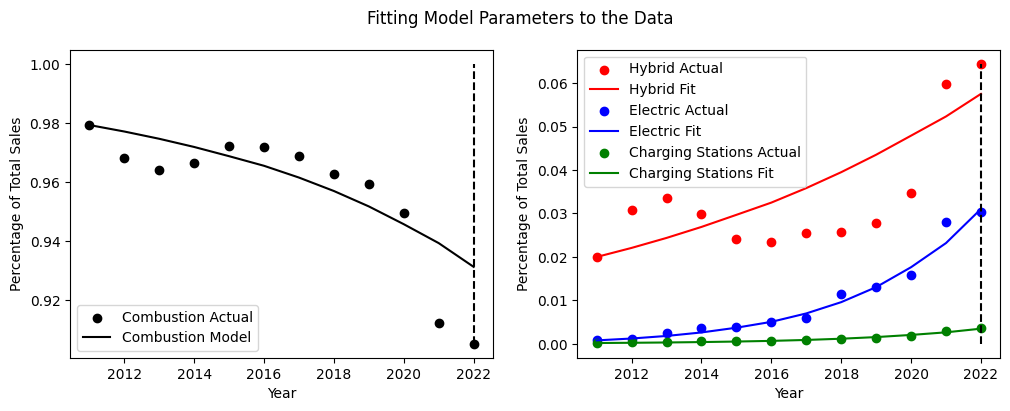

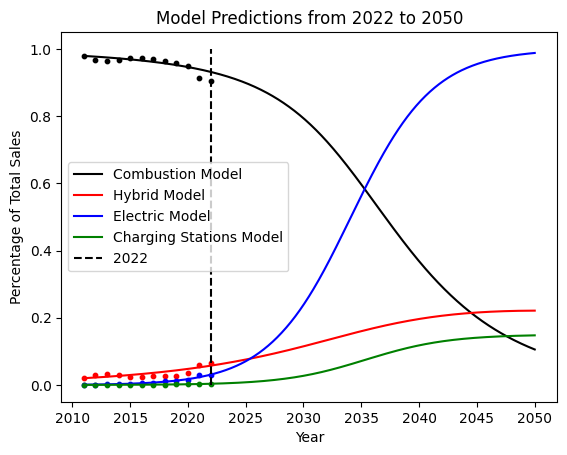

model_C in 2022: 0.9312385162074331
actualC in 2022: 0.9052276182515812
model_H in 2022: 0.05755245803921581
actualH in 2022: 0.0644978709121183
model_E in 2022: 0.031035190914776165
actualE in 2022: 0.0302745108363004
model_S in 2022: 0.0034675998576907834
actualS in 2022: 0.003538432175223604


In [8]:
def ces(t, y, K_ch, K_ce, K_he, alpha, beta, C_s):
    #print(y[0], y[1], y[2], y[3], C_s, y[3] / C_s)
    return (
        -K_ch * y[0] * y[1] - K_ce * y[0] * y[2],
        K_ch * y[0] * y[1] - K_he * y[1] * y[2],
        (K_ce * y[0] * y[2] + K_he * y[1] * y[2] + alpha * y[3]) * (1-y[2]),
        beta * y[3] * (1 - y[3] / C_s)
    )

# go from 2011 to 2050
t_span = (0, 50-11)
ts = np.linspace(*t_span, 500)

ts_int = ts.astype(int)
ts_yr_inds = np.where(ts_int[1:] != ts_int[:-1])[0] + 1
ts_yr_inds = np.concatenate([[0], ts_yr_inds])

mn_yr, mx_yr = rel_sales_df['Year'].min(), rel_sales_df['Year'].max()
ts_2011 = (ts[ts_yr_inds] + 2011).astype(int)
inner_years = (ts_2011 >= mn_yr) & (ts_2011 <= mx_yr)
inner_ts_yr_inds = ts_yr_inds[inner_years]

c_shift = 0.0
all_shift = 1

y0 = np.array([
    0.979250,
    0.019982,
    0.000769,
    0.000162
])

y0 = np.array([
    rel_sales_df['Combustion_ratio'].values[0],
    rel_sales_df['Hybrid_ratio'].values[0],
    rel_sales_df['Electric_ratio'].values[0],
    rel_sales_df['Station Locations Ratio'].values[0]
])

print(y0.reshape((-1,1)))

K_ch = 0.10
K_ce = 0.11
K_he = 0.01
alpha = 1.7
beta = 0.28
C_s = 0.15#0.003538 * 3.2
solution = solve_ivp(ces, t_span, y0, t_eval=ts, args=(K_ch, K_ce, K_he, alpha, beta, C_s))

C = rel_sales_df['Combustion_ratio'].values
H = rel_sales_df['Hybrid_ratio'].values
E = rel_sales_df['Electric_ratio'].values
S = rel_sales_df['Station Locations Ratio'].values

model_yrs = ts + 2011
model_C = solution.y[0]
model_H = solution.y[1]
model_E = solution.y[2]
model_S = solution.y[3]

plt.subplot(1,2,1)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color=color_map['blue'], label='Combustion Actual')
plt.plot(rel_sales_df['Year'], model_C[inner_ts_yr_inds], color=color_map['blue'], label='Combustion Model')
plt.vlines(2022, rel_sales_df['Combustion_ratio'].min(), 1, linestyles='dashed', color='black')
plt.legend(loc='lower left')
plt.ylabel("Percentage of Total Sales")
plt.xlabel("Year")

plt.subplot(1,2,2)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color=color_map['orange'], label='Hybrid Actual')
plt.plot(rel_sales_df['Year'], model_H[inner_ts_yr_inds], color=color_map['orange'], label='Hybrid Fit')
plt.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color=color_map['green'], label='Electric Actual')
plt.plot(rel_sales_df['Year'], model_E[inner_ts_yr_inds], color=color_map['green'], label='Electric Fit')
plt.scatter(rel_sales_df['Year'], rel_sales_df['Station Locations Ratio'], color=color_map['red'], label='Charging Stations Actual')
plt.plot(rel_sales_df['Year'], model_S[inner_ts_yr_inds], color=color_map['red'], label='Charging Stations Fit')
plt.vlines(2022, 0, rel_sales_df['Hybrid_ratio'].max(), linestyles='dashed', color='black')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percentage of Total Sales")

plt.suptitle("Fitting Model Parameters to the Data")
plt.gcf().set_size_inches(12, 4)
plt.show()


dot_size = 10
plt.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color=color_map['blue'], s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color=color_map['orange'], s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color=color_map['green'], s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Station Locations Ratio'], color=color_map['red'], s=dot_size)
#plt.scatter(rel_sales_df['Year'], all_shift * (rel_sales_df['Combustion_ratio']-c_shift), label='Combustion')
plt.plot(model_yrs, model_C, label='Combustion Model', color=color_map['blue'])
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Hybrid_ratio'], label='Hybrid')
plt.plot(model_yrs, model_H, label='Hybrid Model', color=color_map['orange'])
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Electric_ratio'], label='Electric')
plt.plot(model_yrs, model_E, label='Electric Model', color=color_map['green'])
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Station Locations Ratio'], label='Charging Stations')
plt.plot(model_yrs, model_S, label='Charging Stations Model', color=color_map['red'])
plt.vlines(2022, 0, 1, linestyles='dashed', color='black', label='2022')
plt.title("Model from 2011 to 2050")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Sales")
plt.legend()

plt.title("Model Predictions from 2022 to 2050")
plt.show()

ind_2022 = np.argsort(np.abs(ts + 2011 - 2022))[0]
print("model_C in 2022:", model_C[ind_2022])
print("actualC in 2022:", C[-1])
print("model_H in 2022:", model_H[ind_2022])
print("actualH in 2022:", H[-1])
print("model_E in 2022:", model_E[ind_2022])
print("actualE in 2022:", E[-1])
print("model_S in 2022:", model_S[ind_2022])
print("actualS in 2022:", S[-1])




[[0.9792496]
 [0.0199819]
 [0.0007685]]


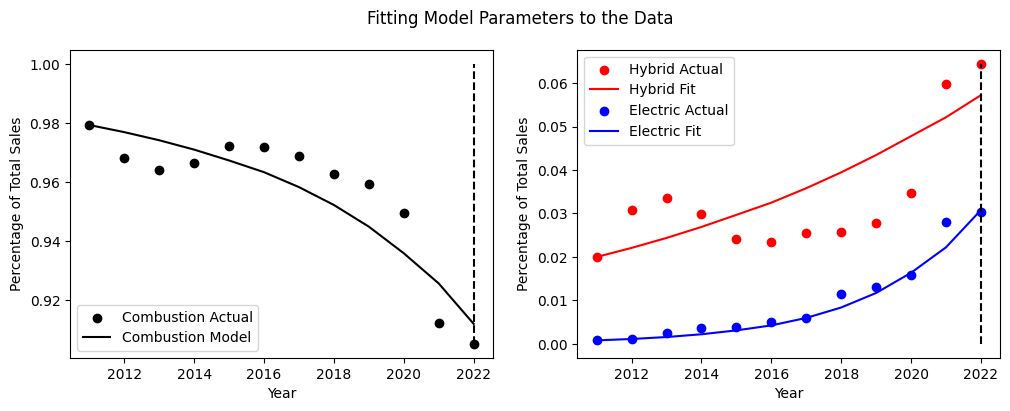

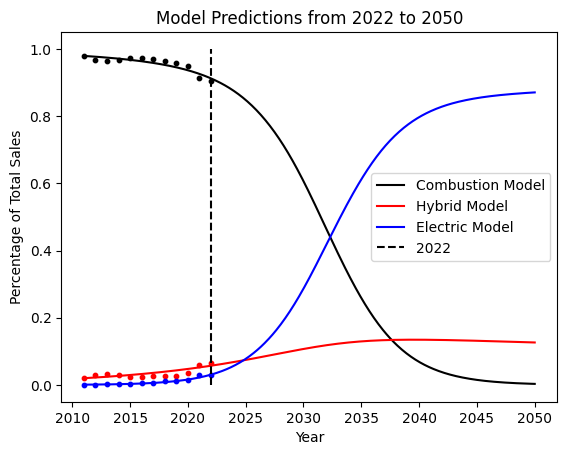

model_C in 2022: 0.9119515281494812
actualC in 2022: 0.9052276182515812
model_H in 2022: 0.05725534009596283
actualH in 2022: 0.0644978709121183
model_E in 2022: 0.030793131754555805
actualE in 2022: 0.0302745108363004


In [14]:
def ces(t, y, K_ch, K_ce, K_he, alpha, beta, C_s):
    #print(y[0], y[1], y[2], y[3], C_s, y[3] / C_s)
    return (
        -K_ch * y[0] * y[1] - K_ce * y[0] * y[2],
        K_ch * y[0] * y[1] - K_he * y[1] * y[2],
        (K_ce * y[0] * y[2] + K_he * y[1] * y[2] + alpha * y[3]) * (1-y[2]),
        beta * y[3] * (1 - y[3] / C_s)
    )

def ces(t, y, K_ch, K_ce, K_he):
    #print(y[0], y[1], y[2], y[3], C_s, y[3] / C_s)
    return (
        -K_ch * y[0] * y[1] - K_ce * y[0] * y[2],
        K_ch * y[0] * y[1] - K_he * y[1] * y[2],
        K_ce * y[0] * y[2] + K_he * y[1] * y[2]
    )

# go from 2011 to 2050
t_span = (0, 50-11)
ts = np.linspace(*t_span, 500)

ts_int = ts.astype(int)
ts_yr_inds = np.where(ts_int[1:] != ts_int[:-1])[0] + 1
ts_yr_inds = np.concatenate([[0], ts_yr_inds])

mn_yr, mx_yr = rel_sales_df['Year'].min(), rel_sales_df['Year'].max()
ts_2011 = (ts[ts_yr_inds] + 2011).astype(int)
inner_years = (ts_2011 >= mn_yr) & (ts_2011 <= mx_yr)
inner_ts_yr_inds = ts_yr_inds[inner_years]

c_shift = 0.0
all_shift = 1

y0 = np.array([
    0.979250,
    0.019982,
    0.000769
])

y0 = np.array([
    rel_sales_df['Combustion_ratio'].values[0],
    rel_sales_df['Hybrid_ratio'].values[0],
    rel_sales_df['Electric_ratio'].values[0]
])

print(y0.reshape((-1,1)))

K_ch = 0.10
K_ce = 0.35
K_he = 0.01
solution = solve_ivp(ces, t_span, y0, t_eval=ts, args=(K_ch, K_ce, K_he))

C = rel_sales_df['Combustion_ratio'].values
H = rel_sales_df['Hybrid_ratio'].values
E = rel_sales_df['Electric_ratio'].values

model_yrs = ts + 2011
model_C = solution.y[0]
model_H = solution.y[1]
model_E = solution.y[2]

plt.subplot(1,2,1)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color=color_map['blue'], label='Combustion Actual')
plt.plot(rel_sales_df['Year'], model_C[inner_ts_yr_inds], color=color_map['blue'], label='Combustion Model')
plt.vlines(2022, rel_sales_df['Combustion_ratio'].min(), 1, linestyles='dashed', color='black')
plt.legend(loc='lower left')
plt.ylabel("Percentage of Total Sales")
plt.xlabel("Year")

plt.subplot(1,2,2)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color=color_map['orange'], label='Hybrid Actual')
plt.plot(rel_sales_df['Year'], model_H[inner_ts_yr_inds], color=color_map['orange'], label='Hybrid Fit')
plt.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color=color_map['green'], label='Electric Actual')
plt.plot(rel_sales_df['Year'], model_E[inner_ts_yr_inds], color=color_map['green'], label='Electric Fit')
plt.vlines(2022, 0, rel_sales_df['Hybrid_ratio'].max(), linestyles='dashed', color='black')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percentage of Total Sales")

plt.suptitle("Fitting Model Parameters to the Data")
plt.gcf().set_size_inches(12, 4)
plt.show()


dot_size = 10
plt.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color=color_map['blue'], s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color=color_map['orange'], s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color=color_map['green'], s=dot_size)
#plt.scatter(rel_sales_df['Year'], all_shift * (rel_sales_df['Combustion_ratio']-c_shift), label='Combustion')
plt.plot(model_yrs, model_C, label='Combustion Model', color=color_map['blue'])
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Hybrid_ratio'], label='Hybrid')
plt.plot(model_yrs, model_H, label='Hybrid Model', color=color_map['orange'])
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Electric_ratio'], label='Electric')
plt.plot(model_yrs, model_E, label='Electric Model', color=color_map['green'])
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Station Locations Ratio'], label='Charging Stations')
plt.vlines(2022, 0, 1, linestyles='dashed', color='black', label='2022')
plt.title("Model from 2011 to 2050")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Sales")
plt.legend()

plt.title("Model Predictions from 2022 to 2050")
plt.show()

ind_2022 = np.argsort(np.abs(ts + 2011 - 2022))[0]
print("model_C in 2022:", model_C[ind_2022])
print("actualC in 2022:", C[-1])
print("model_H in 2022:", model_H[ind_2022])
print("actualH in 2022:", H[-1])
print("model_E in 2022:", model_E[ind_2022])
print("actualE in 2022:", E[-1])




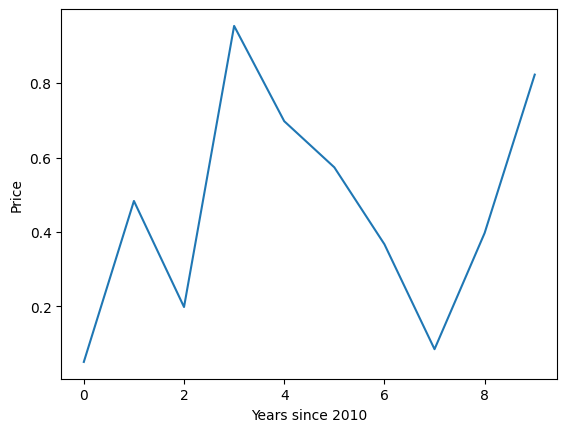

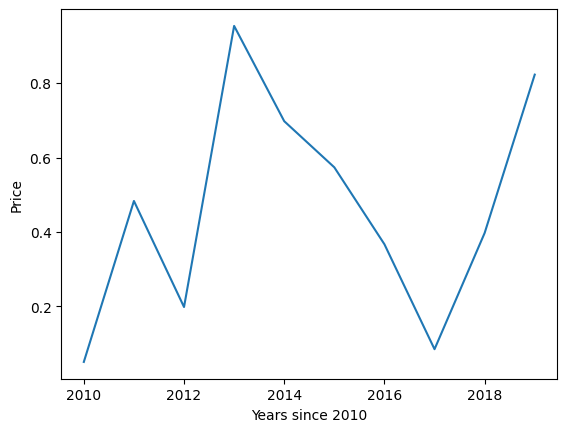

In [17]:
arr = np.random.random(10)
years_since_2010 = np.arange(10)

plt.plot(years_since_2010, arr)
plt.xlabel("Years since 2010")
plt.ylabel("Price")
plt.show()


plt.plot(years_since_2010+2010, arr)
plt.xlabel("Years since 2010")
plt.ylabel("Price")
plt.show()

### end paper plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined your data and models
# rel_sales_df, model_C, model_H, model_E, model_S, inner_ts_yr_inds, color_map

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1]})
fig.subplots_adjust(hspace=0.05)

# Plot Combustion in the top subplot
ax1.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color=color_map['blue'], label='Combustion')
ax1.plot(rel_sales_df['Year'], model_C[inner_ts_yr_inds], color=color_map['blue'], label='Combustion Model')

# Create a broken y-axis
ax1.set_xlim(min(rel_sales_df['Year']), max(rel_sales_df['Year']))
ax1.set_ylim(0.85, 1)  # Set your y-axis limits

# Create a broken line in the y-axis
d = .01  # Set the distance of the break lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Plot Hybrid, Electric, and Charging Stations in the bottom subplot
ax2.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color=color_map['orange'], label='Hybrid')
ax2.plot(rel_sales_df['Year'], model_H[inner_ts_yr_inds], color=color_map['orange'], label='Hybrid Model')

ax2.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color=color_map['green'], label='Electric')
ax2.plot(rel_sales_df['Year'], model_E[inner_ts_yr_inds], color=color_map['green'], label='Electric Model')

ax2.scatter(rel_sales_df['Year'], rel_sales_df['Station Locations Ratio'], color=color_map['red'], label='Charging Stations')
ax2.plot(rel_sales_df['Year'], model_S[inner_ts_yr_inds], color=color_map['red'], label='Charging Stations Model')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# Show the plot
plt.show()


In [ ]:
ts_int = ts.astype(int)
ts_yr_inds = np.where(ts_int[1:] != ts_int[:-1])[0] + 1
ts_yr_inds = np.concatenate([[0], ts_yr_inds])

mn_yr, mx_yr = rel_sales_df['Year'].min(), rel_sales_df['Year'].max()
ts_2011 = (ts[ts_yr_inds] + 2011).astype(int)
inner_years = (ts_2011 >= mn_yr) & (ts_2011 <= mx_yr)
inner_ts_yr_inds = ts_yr_inds[inner_years]

print(ts[ts_yr_inds] + 2011)

In [ ]:
mn_yr, mx_yr = rel_sales_df['Year'].min(), rel_sales_df['Year'].max()
ts_2011 = (ts[ts_yr_inds] + 2011).astype(int)
inner_years = (ts_2011 >= mn_yr) & (ts_2011 <= mx_yr)
inner_ts_yr_inds = ts_yr_inds[inner_years]

C_ = model_C[inner_ts_yr_inds]
H_ = model_H[inner_ts_yr_inds]
E_ = model_E[inner_ts_yr_inds]
S_ = model_S[inner_ts_yr_inds]

print(inner_ts_yr_inds)



thingy = (
    (C - C_) + 
    (H - H_) + 
    (E - E_) +
    (S - S_))

print(thingy)
print(thingy.shape)